In [ ]:
import zipfile
import os

In [4]:
zip_path = "archive.zip"


extract_folder = "data"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extraction completed successfully!")

Extraction completed successfully!


In [5]:
os.listdir(extract_folder)

['movies_dataset.csv']

In [8]:
import pandas as pd
df =pd.read_csv("data/movies_dataset.csv")
print(df.head())
print(df.info())

   MovieID                         Title        Genre  ReleaseYear  \
0        1          Might toward capital       Comedy         2003   
1        2         He however experience       Comedy         1988   
2        3  Star responsibility politics       Comedy         1971   
3        4                  Exactly live       Comedy         1998   
4        5      Focus improve especially  Documentary         2021   

  ReleaseDate Country   BudgetUSD  US_BoxOfficeUSD  Global_BoxOfficeUSD  \
0  28-09-2003   China  6577427.79       6613685.82          15472035.66   
1  14-02-1988     USA  1883810.10       1930949.15           3637731.12   
2  02-11-1971     USA  2468079.29       4186694.69           7165111.24   
3  06-08-1998     USA  1447311.46       2023683.92           4373820.26   
4  17-12-2021   India   900915.86       2129629.10           3113017.38   

   Opening_Day_SalesUSD  One_Week_SalesUSD  IMDbRating  RottenTomatoesScore  \
0            1778530.85         3034053.32       

In [9]:
df.describe()

,MovieID,ReleaseYear,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT
count,999999.000000,999999.000000,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,999999.000000,999999.000000,999999.000000,999999.000000
mean,500000.000000,1998.001220,9.802824e+06,1.496163e+07,2.720625e+07,2.992745e+06,7.483442e+06,6.494788,64.776426,9137.184011,2031.880340
std,288674.990255,19.260863,2.249421e+07,3.879403e+07,6.954294e+07,8.132438e+06,1.955337e+07,1.485606,17.592474,24922.362780,8433.380602
min,1.000000,1950.000000,1.000000e+05,4.002547e+04,1.000000e+05,4.050470e+03,1.650742e+04,1.000000,0.000000,100.000000,50.000000
25%,250000.500000,1984.000000,1.190511e+06,1.489805e+06,2.762370e+06,2.790262e+05,7.383145e+05,5.500000,53.000000,1083.000000,119.000000
50%,500000.000000,2001.000000,3.265790e+06,4.388876e+06,8.090223e+06,8.387221e+05,2.179436e+06,6.500000,65.000000,2983.000000,405.000000
75%,749999.500000,2014.000000,9.002791e+06,1.287606e+07,2.355245e+07,2.510360e+06,6.415143e+06,7.500000,77.000000,8192.000000,1360.000000
max,999999.000000,2025.000000,3.000000e+08,1.018198e+09,1.499497e+09,2.957511e+08,5.795551e+08,10.000000,100.000000,1000000.000000,500000.000000


In [10]:
# check if data is null
df.isnull().sum()

,0
MovieID,0
Title,0
Genre,0
ReleaseYear,0
ReleaseDate,0
Country,0
BudgetUSD,0
US_BoxOfficeUSD,0
Global_BoxOfficeUSD,0
Opening_Day_SalesUSD,0


In [11]:
# check if data have duplicated
df.duplicated().sum()

np.int64(0)

In [15]:
# conver ralesedate from string to data time
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], dayfirst=True, errors='coerce')
df.dtypes

,0
MovieID,int64
Title,object
Genre,object
ReleaseYear,int64
ReleaseDate,datetime64[ns]
Country,object
BudgetUSD,float64
US_BoxOfficeUSD,float64
Global_BoxOfficeUSD,float64
Opening_Day_SalesUSD,float64


In [12]:
# check releaseyear
df[(df['ReleaseYear'] < 1900) | (df['ReleaseYear']>2025)]

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor


In [13]:
#check if budget have negataive value
df[(df['BudgetUSD'] < 0) | (df['US_BoxOfficeUSD'] < 0) | (df['Global_BoxOfficeUSD']<0)]

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor


In [14]:
#calculate profit & ROI
df['Profit'] = df['Global_BoxOfficeUSD'] - df['BudgetUSD']
df['ROI'] = df['Profit'] /df['BudgetUSD']
df.head()

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor,Profit,ROI
0,1,Might toward capital,Comedy,2003,28-09-2003,China,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,Kristina Moore,Brian Mccormick,8894607.87,1.352293
1,2,He however experience,Comedy,1988,14-02-1988,USA,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,Benjamin Hudson,Ashley Pena,1753921.02,0.931050
2,3,Star responsibility politics,Comedy,1971,02-11-1971,USA,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,Kayla Young,Alexander Haley,4697031.95,1.903112
3,4,Exactly live,Comedy,1998,06-08-1998,USA,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,Michael Ross,Patrick Barnett,2926508.80,2.022031
4,5,Focus improve especially,Documentary,2021,17-12-2021,India,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,Faith Franklin,Duane Fletcher DDS,2212101.52,2.455392


In [62]:
# calculate mean for genre profit
genre_profit = df.groupby("Genre")["Global_BoxOfficeUSD"].mean().sort_values(ascending=False)
print(genre_profit.head(10))

Genre
Documentary    2.758178e+07
Horror         2.748073e+07
Thriller       2.743435e+07
Romance        2.728314e+07
Comedy         2.721993e+07
Drama          2.715240e+07
Sci-Fi         2.697233e+07
Action         2.684386e+07
Name: Global_BoxOfficeUSD, dtype: float64


In [16]:
# check top_roi
top_roi = df[['Title','ROI','Global_BoxOfficeUSD','BudgetUSD']].sort_values(by='ROI', ascending=False).head(10)
display(top_roi)

,Title,ROI,Global_BoxOfficeUSD,BudgetUSD
360046,Loss provide too,3.999999,4.199727e+07,8399455.22
201198,Else state,3.999978,2.085137e+07,4170292.26
278354,Why team program,3.999960,2.261214e+06,452246.45
446247,Each sport,3.999953,2.315622e+08,46312880.36
809292,Likely we chance,3.999950,4.804480e+06,960905.54
637164,Try consumer,3.999947,6.957262e+07,13914671.62
43324,And son,3.999946,2.674819e+07,5349695.09
828992,Nice side,3.999946,6.357430e+06,1271499.68
431026,Lot natural,3.999946,7.928039e+06,1585625.10
765970,Their offer,3.999944,1.527053e+07,3054141.14


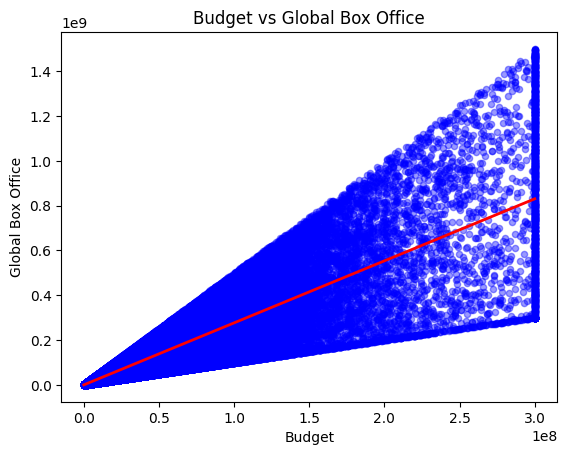

In [67]:
#relation between BudgetUSD & Global_BoxOfficeUSD
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    x='BudgetUSD',
    y='Global_BoxOfficeUSD',
    data=df,
    scatter_kws={'alpha':0.4, 's':20, 'color':'blue'},
    line_kws={'color':'red', 'linewidth':2}
)

plt.title('Budget vs Global Box Office')
plt.xlabel('Budget')
plt.ylabel('Global Box Office')
plt.show()

In [17]:
# ckeck top roi movies
top_roi_movies = df[["Title", "ROI"]].sort_values(by="ROI", ascending=False).head(10)
display(top_roi_movies)

,Title,ROI
360046,Loss provide too,3.999999
201198,Else state,3.999978
278354,Why team program,3.999960
446247,Each sport,3.999953
809292,Likely we chance,3.999950
637164,Try consumer,3.999947
43324,And son,3.999946
828992,Nice side,3.999946
431026,Lot natural,3.999946
765970,Their offer,3.999944


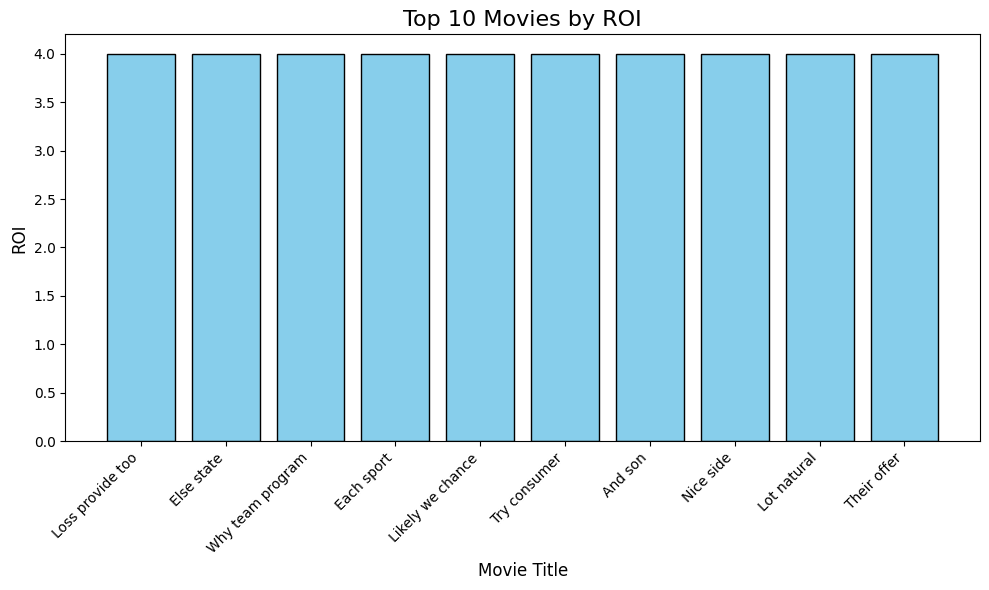

In [20]:
#visualize top roi movies
import matplotlib.pyplot as plt


top_roi_movies = df[["Title", "ROI"]].sort_values(by="ROI", ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_roi_movies["Title"], top_roi_movies["ROI"], color="skyblue", edgecolor="black")

plt.title("Top 10 Movies by ROI", fontsize=16)
plt.xlabel("Movie Title", fontsize=12)
plt.ylabel("ROI", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [22]:
# average for top genres
top_genres_by_avg = df.groupby("Genre")["Global_BoxOfficeUSD"].mean().sort_values(ascending=False).head(10)
display(top_genres_by_avg)

,Global_BoxOfficeUSD
Genre,
Documentary,2.758178e+07
Horror,2.748073e+07
Thriller,2.743435e+07
Romance,2.728314e+07
Comedy,2.721993e+07
Drama,2.715240e+07
Sci-Fi,2.697233e+07
Action,2.684386e+07


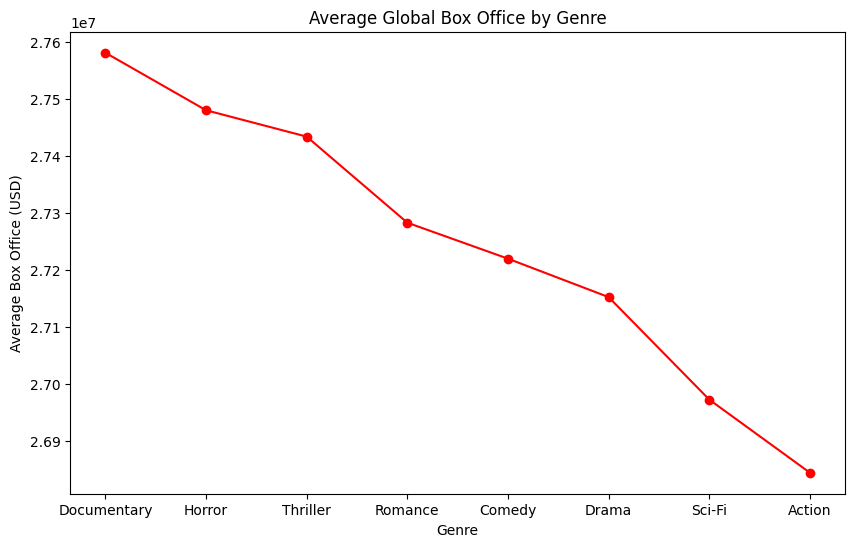

In [23]:
# visualize top genres
top_genres_by_avg.plot(kind="line", marker="o", figsize=(10,6), color="red")
plt.title("Average Global Box Office by Genre")
plt.ylabel("Average Box Office (USD)")
plt.show()

In [38]:
#check top 10 countris
import pandas as pd

def top_10_countries(df, column="Global_BoxOfficeUSD"):

    df[column] = pd.to_numeric(df[column], errors="coerce")


    country_stats = df.groupby("Country")[column].sum().sort_values(ascending=False).head(10)


    print(country_stats)

    return country_stats


top_10_countries(df, "Global_BoxOfficeUSD")

Country
USA            1.942559e+13
UK             1.424605e+12
India          1.394296e+12
Canada         1.106603e+12
China          8.301484e+11
Australia      8.277308e+11
France         8.253184e+11
Germany        5.507426e+11
Japan          5.431587e+11
South Korea    2.780330e+11
Name: Global_BoxOfficeUSD, dtype: float64


,Global_BoxOfficeUSD
Country,
USA,1.942559e+13
UK,1.424605e+12
India,1.394296e+12
Canada,1.106603e+12
China,8.301484e+11
Australia,8.277308e+11
France,8.253184e+11
Germany,5.507426e+11
Japan,5.431587e+11


Country
USA            1.942559e+13
UK             1.424605e+12
India          1.394296e+12
Canada         1.106603e+12
China          8.301484e+11
Australia      8.277308e+11
France         8.253184e+11
Germany        5.507426e+11
Japan          5.431587e+11
South Korea    2.780330e+11
Name: Global_BoxOfficeUSD, dtype: float64


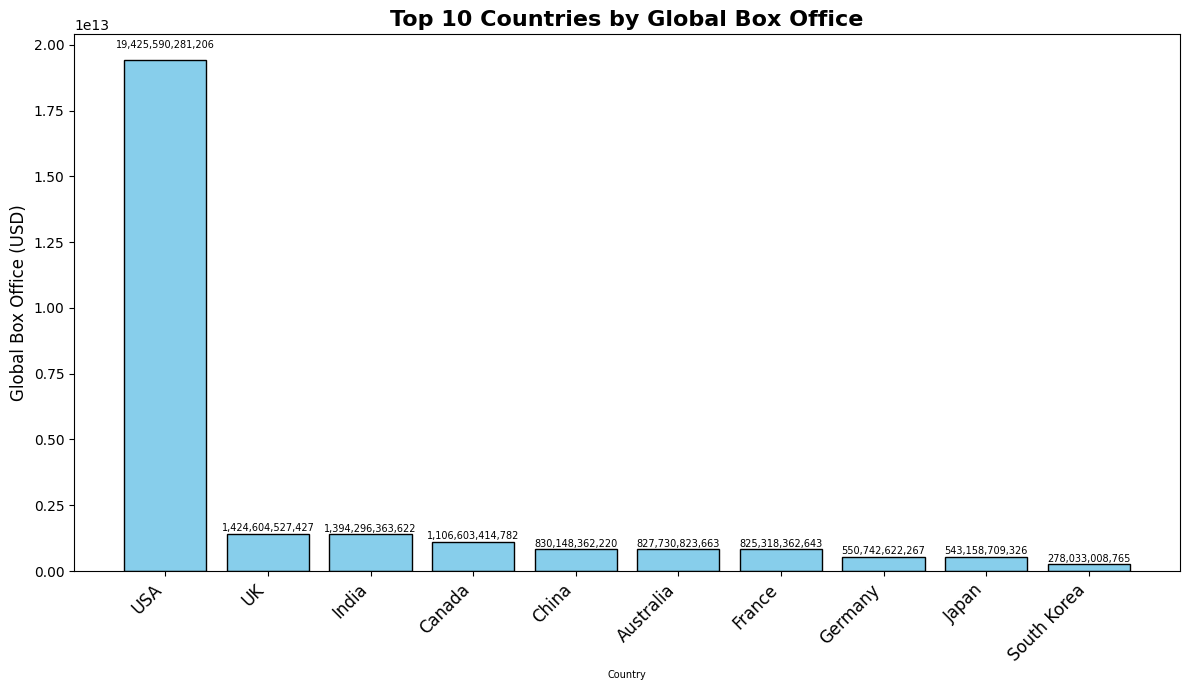

In [61]:
#visualize for top 10 countrries
import matplotlib.pyplot as plt
country_stats = top_10_countries(df, "Global_BoxOfficeUSD")
plt.figure(figsize=(12,7))

bars = plt.bar(country_stats.index, country_stats.values, color="skyblue", edgecolor="black")

plt.title("Top 10 Countries by Global Box Office", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=7)
plt.ylabel("Global Box Office (USD)", fontsize=12)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.02 * bar.get_height(),
             f"{bar.get_height():,.0f}",
             ha='center', va='bottom', fontsize=7)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()